# Importing libraries

In [169]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

 # Data Collection and Understanding:

In [164]:
df = pd.read_csv("C:\\Users\\franc\\Desktop\\capstone project\\customer_train.csv")
df.head()

,Unnamed: 0.1,Unnamed: 0,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,0,0,5524,1957,S1,Lajang,58138000.0,0,0,04-09-2012,...,7,0,0,0,0,0,0,3,11,1
1,1,1,2174,1954,S1,Lajang,46344000.0,1,1,08-03-2014,...,5,0,0,0,0,0,0,3,11,0
2,2,2,4141,1965,S1,Bertunangan,71613000.0,0,0,21-08-2013,...,4,0,0,0,0,0,0,3,11,0
3,3,3,6182,1984,S1,Bertunangan,26646000.0,1,0,10-02-2014,...,6,0,0,0,0,0,0,3,11,0
4,4,4,5324,1981,S3,Menikah,58293000.0,1,0,19-01-2014,...,5,0,0,0,0,0,0,3,11,0


In [165]:
df.shape

(1680, 31)

In [233]:
df.dropna(inplace=True)

In [166]:
df.isna().sum()

Unnamed: 0.1            0
Unnamed: 0              0
ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 17
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntCoke                 0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [170]:
df_cleaned = df.dropna(subset=['Income'])

In [171]:
df_cleaned.dtypes

Unnamed: 0.1             int64
Unnamed: 0               int64
ID                       int64
Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntCoke                  int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Z_CostContact            int64
Z_Revenue                int64
Response                 int64
dtype: object

In [172]:
del df_cleaned['Unnamed: 0']

In [173]:
df=df_cleaned

In [174]:
df.head(20)

,Unnamed: 0.1,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,0,5524,1957,S1,Lajang,58138000.0,0,0,04-09-2012,58,...,7,0,0,0,0,0,0,3,11,1
1,1,2174,1954,S1,Lajang,46344000.0,1,1,08-03-2014,38,...,5,0,0,0,0,0,0,3,11,0
2,2,4141,1965,S1,Bertunangan,71613000.0,0,0,21-08-2013,26,...,4,0,0,0,0,0,0,3,11,0
3,3,6182,1984,S1,Bertunangan,26646000.0,1,0,10-02-2014,26,...,6,0,0,0,0,0,0,3,11,0
4,4,5324,1981,S3,Menikah,58293000.0,1,0,19-01-2014,94,...,5,0,0,0,0,0,0,3,11,0
5,5,7446,1967,S2,Bertunangan,62513000.0,0,1,09-09-2013,16,...,6,0,0,0,0,0,0,3,11,0
6,6,965,1971,S1,Cerai,55635000.0,0,1,13-11-2012,34,...,6,0,0,0,0,0,0,3,11,0
7,7,6177,1985,S3,Menikah,33454000.0,1,0,08-05-2013,32,...,8,0,0,0,0,0,0,3,11,0
8,8,4855,1974,S3,Bertunangan,30351000.0,1,0,06-06-2013,19,...,9,0,0,0,0,0,0,3,11,1
9,9,5899,1950,S3,Bertunangan,5648000.0,1,1,13-03-2014,68,...,20,1,0,0,0,0,0,3,11,0


In [175]:
df.columns

Index(['Unnamed: 0.1', 'ID', 'Year_Birth', 'Education', 'Marital_Status',
       'Income', 'Kidhome', 'Teenhome', 'Dt_Customer', 'Recency', 'MntCoke',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [176]:
df.describe()

,Unnamed: 0.1,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntCoke,MntFruits,MntMeatProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,1663.000000,1663.000000,1663.000000,1.663000e+03,1663.000000,1663.000000,1663.000000,1.663000e+03,1663.000000,1.663000e+03,...,1663.000000,1663.000000,1663.000000,1663.000000,1663.000000,1663.000000,1663.000000,1663.0,1663.0,1663.000000
mean,843.901383,5547.541191,1968.849068,5.201434e+07,0.449188,0.499098,49.061335,3.060469e+05,25978.352375,1.664546e+05,...,5.331930,0.072159,0.073963,0.069753,0.061936,0.012026,0.010222,3.0,11.0,0.145520
std,482.471617,3240.106517,12.037325,2.148248e+07,0.544890,0.549449,28.914182,3.392420e+05,39576.041604,2.248949e+05,...,2.451058,0.258828,0.261789,0.254808,0.241112,0.109037,0.100618,0.0,0.0,0.352731
min,0.000000,0.000000,1893.000000,1.730000e+06,0.000000,0.000000,0.000000,0.000000e+00,0.000000,1.000000e+03,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,428.500000,2814.500000,1960.000000,3.568800e+07,0.000000,0.000000,24.000000,2.400000e+04,1000.000000,1.600000e+04,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,844.000000,5376.000000,1970.000000,5.125000e+07,0.000000,0.000000,50.000000,1.730000e+05,8000.000000,6.800000e+04,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,1259.500000,8369.500000,1977.000000,6.812200e+07,1.000000,1.000000,74.000000,4.990000e+05,32000.000000,2.345000e+05,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,1679.000000,11191.000000,1996.000000,1.623970e+08,2.000000,2.000000,99.000000,1.492000e+06,199000.000000,1.725000e+06,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [177]:
df['Marital_Status'].unique()

array(['Lajang', 'Bertunangan', 'Menikah', 'Cerai', 'Janda', 'Duda'],
      dtype=object)

In [178]:
Mar_Stat={
    'Lajang': 'single',
    'Bertunangan':'Engaged',
    'Menikah':'Married',
    'Cerai':'Divorced',
    'Janda':'Widowed',
    'Duda':'Widowed'
}
    

In [179]:
for i,j in Mar_Stat.items():
    df.loc[df['Marital_Status']==i,'Marital_Status']=j
df['Marital_Status'].unique()

array(['single', 'Engaged', 'Married', 'Divorced', 'Widowed'],
      dtype=object)

In [180]:
df.duplicated().sum()

0

# Exploratory Data Analysis (EDA)

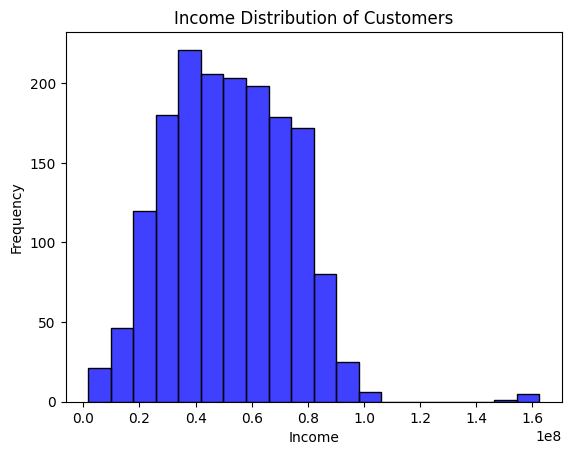

In [181]:
sns.histplot(df['Income'], bins=20, color='blue', edgecolor='black')
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.title('Income Distribution of Customers')
plt.show()


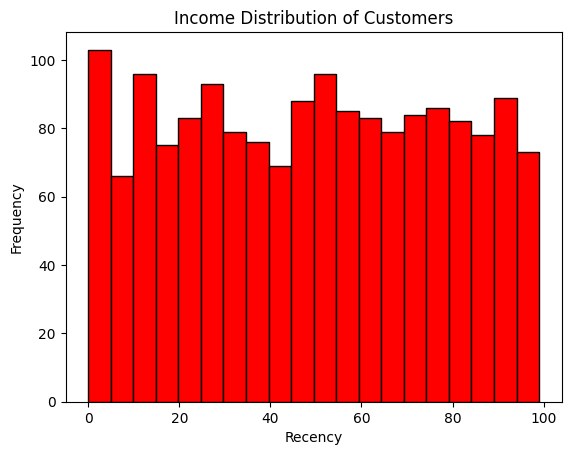

In [182]:
plt.hist(df['Recency'], bins=20, color='red', edgecolor='black')
plt.xlabel('Recency')
plt.ylabel('Frequency')
plt.title('Income Distribution of Customers')
plt.show()

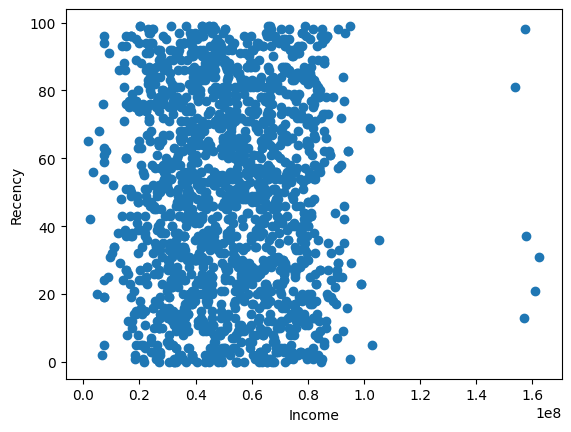

In [183]:
plt.scatter(df['Income'], df['Recency'])

# Add labels and a title
plt.xlabel('Income')
plt.ylabel('Recency')

# Show the plot
plt.show()

# Campaign Response Metrics

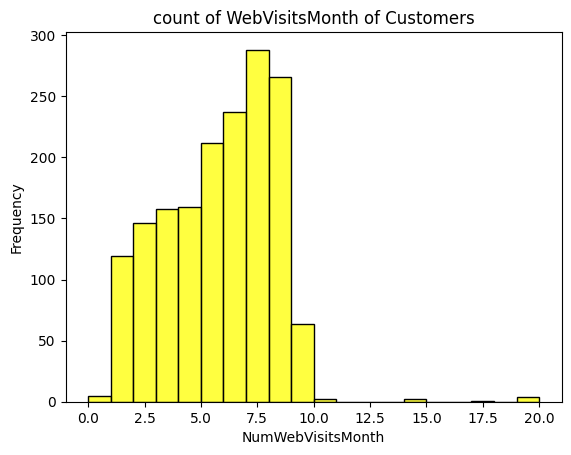

In [184]:
sns.histplot(df['NumWebVisitsMonth'], bins=20, color='yellow', edgecolor='black')
plt.xlabel('NumWebVisitsMonth')
plt.ylabel('Frequency')
plt.title('count of WebVisitsMonth of Customers')
plt.show()


In [185]:
import datetime
current_year = datetime.datetime.now().year
df['Age'] = current_year - df['Year_Birth']
df

,Unnamed: 0.1,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age
0,0,5524,1957,S1,single,58138000.0,0,0,04-09-2012,58,...,0,0,0,0,0,0,3,11,1,66
1,1,2174,1954,S1,single,46344000.0,1,1,08-03-2014,38,...,0,0,0,0,0,0,3,11,0,69
2,2,4141,1965,S1,Engaged,71613000.0,0,0,21-08-2013,26,...,0,0,0,0,0,0,3,11,0,58
3,3,6182,1984,S1,Engaged,26646000.0,1,0,10-02-2014,26,...,0,0,0,0,0,0,3,11,0,39
4,4,5324,1981,S3,Married,58293000.0,1,0,19-01-2014,94,...,0,0,0,0,0,0,3,11,0,42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1675,1675,4712,1991,D3,Engaged,20193000.0,0,0,28-11-2012,18,...,0,0,0,0,0,0,3,11,0,32
1676,1676,1170,1975,S1,Married,27573000.0,1,0,25-03-2013,45,...,0,0,0,0,0,0,3,11,0,48
1677,1677,6347,1979,SMA,single,15862000.0,1,0,27-06-2013,26,...,0,0,0,0,0,0,3,11,0,44
1678,1678,4065,1976,S3,Married,49544000.0,1,0,12-02-2013,0,...,0,0,0,0,0,0,3,11,0,47


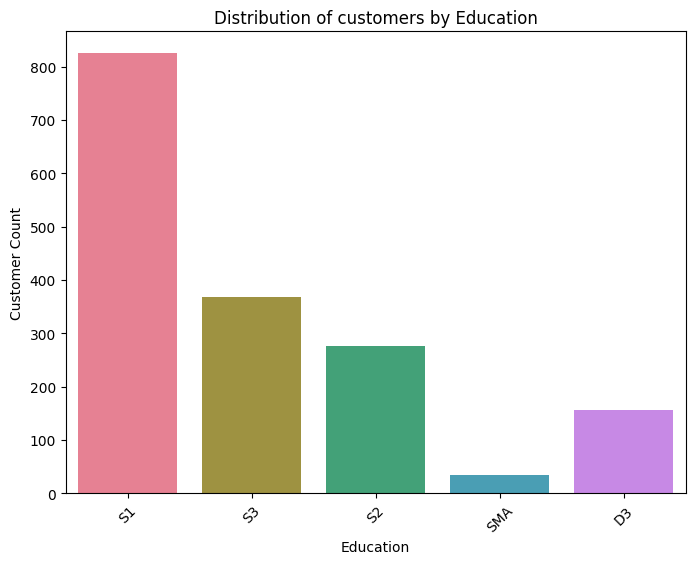

In [186]:
# Define a Seaborn color palette with different colors for each category
palette = sns.color_palette("husl", len(df['Education'].unique()))

# Create a bar plot to visualize the distribution of customers by Education
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Education', palette=palette)

plt.title('Distribution of customers by Education')
plt.xlabel('Education')
plt.ylabel('Customer Count')
plt.xticks(rotation=45)

plt.show()

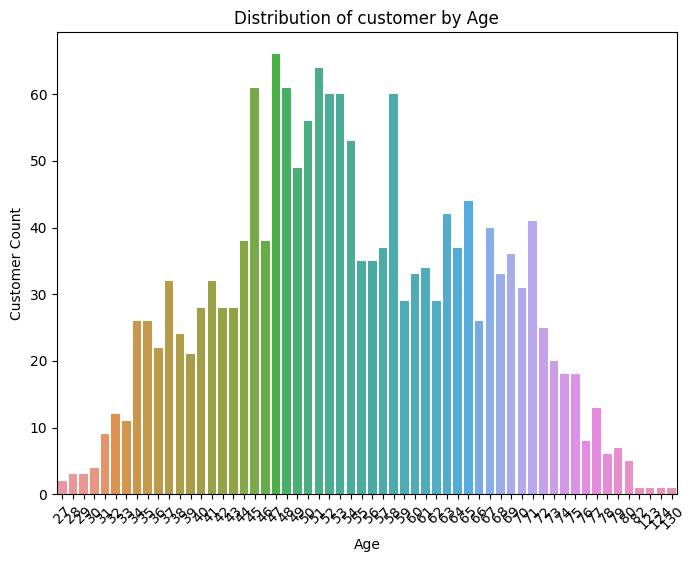

In [187]:

plt.figure(figsize=(8, 6))
sns.countplot(x=df['Age'])

plt.title('Distribution of customer by Age')
plt.xlabel('Age')
plt.ylabel('Customer Count')
plt.xticks(rotation=45)

plt.show()

# Outliers using zscore 

In [188]:
m=df.Income.mean()
m

52014343.35538184

In [189]:
s=df.Income.std()
s

21482477.95704808

In [190]:
df['zscore']=(df.Income-m)/s


In [191]:
outliers=df[(df.zscore<-3)|(df.zscore>3)]
outliers

,Unnamed: 0.1,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,zscore
164,164,8475,1973,S3,Married,157243000.0,0,1,01-03-2014,98,...,0,0,0,0,0,3,11,0,50,4.898348
617,617,1503,1976,S3,Engaged,162397000.0,1,1,03-06-2013,31,...,0,0,0,0,0,3,11,0,47,5.138265
655,655,5555,1975,S1,Divorced,153924000.0,0,0,07-02-2014,81,...,0,0,0,0,0,3,11,0,48,4.743850
687,687,1501,1982,S3,Married,160803000.0,0,0,04-08-2012,21,...,0,0,0,0,0,3,11,0,41,5.064065
1300,1300,5336,1971,S2,Engaged,157733000.0,1,0,04-06-2013,37,...,0,0,0,0,0,3,11,0,52,4.921157
1653,1653,4931,1977,S1,Engaged,157146000.0,0,0,29-04-2013,13,...,0,0,0,0,0,3,11,0,46,4.893833


# correlation

In [192]:
df_corr = df[['ID','Income','Recency','MntCoke','MntFruits','MntMeatProducts',
              'AcceptedCmp4','AcceptedCmp5','AcceptedCmp1','AcceptedCmp2','Complain',
              'Z_Revenue','Response',
              'Age','zscore']].corr()
df_corr

,ID,Income,Recency,MntCoke,MntFruits,MntMeatProducts,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_Revenue,Response,Age,zscore
ID,1.000000,0.022376,-0.044177,0.004183,0.030590,0.022695,-0.005628,0.011904,-0.007754,0.001680,0.050714,NaN,-0.010307,-0.020515,0.022376
Income,0.022376,1.000000,-0.019091,0.686060,0.503633,0.694399,0.219394,0.386579,0.328570,0.092016,-0.038510,NaN,0.141382,0.198168,1.000000
Recency,-0.044177,-0.019091,1.000000,-0.004962,-0.034604,0.011118,0.014901,-0.023856,-0.043525,-0.023708,0.013020,NaN,-0.179394,0.032707,-0.019091
MntCoke,0.004183,0.686060,-0.004962,1.000000,0.379728,0.557398,0.379340,0.468647,0.358517,0.192723,-0.047836,NaN,0.228834,0.171492,0.686060
MntFruits,0.030590,0.503633,-0.034604,0.379728,1.000000,0.538620,0.001548,0.233860,0.195295,-0.000916,-0.015054,NaN,0.122677,0.020878,0.503633
MntMeatProducts,0.022695,0.694399,0.011118,0.557398,0.538620,1.000000,0.092867,0.365088,0.304301,0.033932,-0.038867,NaN,0.206300,0.036398,0.694399
AcceptedCmp4,-0.005628,0.219394,0.014901,0.379340,0.001548,0.092867,1.000000,0.319490,0.251480,0.263922,-0.028721,NaN,0.189619,0.077412,0.219394
AcceptedCmp5,0.011904,0.386579,-0.023856,0.468647,0.233860,0.365088,0.319490,1.000000,0.409518,0.208007,-0.027829,NaN,0.328828,0.007355,0.386579
AcceptedCmp1,-0.007754,0.328570,-0.043525,0.358517,0.195295,0.304301,0.251480,0.409518,1.000000,0.200514,-0.026114,NaN,0.311367,0.023106,0.328570
AcceptedCmp2,0.001680,0.092016,-0.023708,0.192723,-0.000916,0.033932,0.263922,0.208007,0.200514,1.000000,-0.011213,NaN,0.157844,0.022454,0.092016


<Axes: >

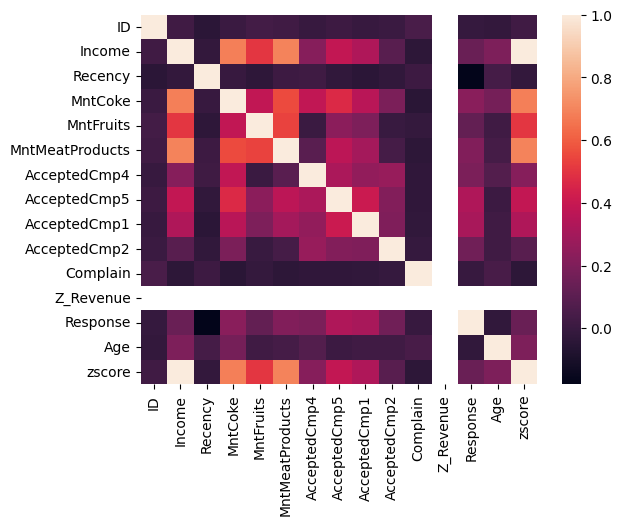

In [193]:
sns.heatmap(df_corr)

In [194]:
df.describe()

,Unnamed: 0.1,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntCoke,MntFruits,MntMeatProducts,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,zscore
count,1663.000000,1663.000000,1663.000000,1.663000e+03,1663.000000,1663.000000,1663.000000,1.663000e+03,1663.000000,1.663000e+03,...,1663.000000,1663.000000,1663.000000,1663.000000,1663.000000,1663.0,1663.0,1663.000000,1663.000000,1.663000e+03
mean,843.901383,5547.541191,1968.849068,5.201434e+07,0.449188,0.499098,49.061335,3.060469e+05,25978.352375,1.664546e+05,...,0.073963,0.069753,0.061936,0.012026,0.010222,3.0,11.0,0.145520,54.150932,5.287412e-17
std,482.471617,3240.106517,12.037325,2.148248e+07,0.544890,0.549449,28.914182,3.392420e+05,39576.041604,2.248949e+05,...,0.261789,0.254808,0.241112,0.109037,0.100618,0.0,0.0,0.352731,12.037325,1.000000e+00
min,0.000000,0.000000,1893.000000,1.730000e+06,0.000000,0.000000,0.000000,0.000000e+00,0.000000,1.000000e+03,...,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,27.000000,-2.340714e+00
25%,428.500000,2814.500000,1960.000000,3.568800e+07,0.000000,0.000000,24.000000,2.400000e+04,1000.000000,1.600000e+04,...,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,46.000000,-7.599842e-01
50%,844.000000,5376.000000,1970.000000,5.125000e+07,0.000000,0.000000,50.000000,1.730000e+05,8000.000000,6.800000e+04,...,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,53.000000,-3.557985e-02
75%,1259.500000,8369.500000,1977.000000,6.812200e+07,1.000000,1.000000,74.000000,4.990000e+05,32000.000000,2.345000e+05,...,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,63.000000,7.498044e-01
max,1679.000000,11191.000000,1996.000000,1.623970e+08,2.000000,2.000000,99.000000,1.492000e+06,199000.000000,1.725000e+06,...,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000,130.000000,5.138265e+00


# Encoding

In [195]:
categorical_columns = df.select_dtypes(include=['object', 'category']).columns
categorical_columns

Index(['Education', 'Marital_Status', 'Dt_Customer'], dtype='object')

In [196]:
cols_to_encode =['Education', 'Marital_Status', 'Dt_Customer']

In [197]:
new_encoded_cols_names = []
for col in cols_to_encode:
    new_encoded_cols_names += [f"is_{category}" for category in df[col].unique().tolist()]
one_hot_encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
encoded_cols = one_hot_encoder.fit_transform(df[cols_to_encode])

df_encoded = pd.DataFrame(encoded_cols, columns=new_encoded_cols_names)
df_one_hot_encoded = df.join(df_encoded)

df_one_hot_encoded.head()
    

,Unnamed: 0.1,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,...,is_27-06-2013,is_01-06-2013,is_05-10-2013,is_22-02-2014,is_12-04-2013,is_23-09-2013,is_24-07-2013,is_23-06-2014,is_10-01-2014,is_25-03-2013
0,0,5524,1957,S1,single,58138000.0,0,0,04-09-2012,58,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,2174,1954,S1,single,46344000.0,1,1,08-03-2014,38,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,4141,1965,S1,Engaged,71613000.0,0,0,21-08-2013,26,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,6182,1984,S1,Engaged,26646000.0,1,0,10-02-2014,26,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,5324,1981,S3,Married,58293000.0,1,0,19-01-2014,94,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Data Splitting & feature scaling

In [198]:
numeric_columns = df_one_hot_encoded.select_dtypes(include=['number'])

In [199]:
scaler = StandardScaler()
scaler.fit(numeric_columns)
scaled_data = pd.DataFrame(scaler.transform(numeric_columns), columns=numeric_columns.columns)

scaled_data.head()

,Unnamed: 0.1,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntCoke,MntFruits,MntMeatProducts,...,is_27-06-2013,is_01-06-2013,is_05-10-2013,is_22-02-2014,is_12-04-2013,is_23-09-2013,is_24-07-2013,is_23-06-2014,is_10-01-2014,is_25-03-2013
0,-1.749647,-0.007268,-0.984657,0.285139,-0.824613,-0.908634,0.309238,0.969963,1.567623,1.688165,...,-0.049356,-0.042731,-0.024656,-0.034879,-0.024656,-0.034879,-0.078182,-0.049356,-0.055199,-0.042731
1,-1.747574,-1.041495,-1.233956,-0.264031,1.011172,0.911918,-0.382672,-0.869986,-0.631338,-0.713680,...,-0.049356,-0.042731,-0.024656,-0.034879,-0.024656,-0.034879,-0.078182,-0.049356,-0.055199,-0.042731
2,-1.745501,-0.434234,-0.319857,0.912583,-0.824613,-0.908634,-0.797819,0.353698,0.581882,-0.175489,...,-0.049356,-0.042731,-0.024656,-0.034879,-0.024656,-0.034879,-0.078182,-0.049356,-0.055199,-0.042731
3,-1.743428,0.195873,1.259041,-1.181241,1.011172,-0.908634,-0.797819,-0.869986,-0.555512,-0.651410,...,-0.049356,-0.042731,-0.024656,-0.034879,-0.024656,-0.034879,-0.078182,-0.049356,-0.055199,-0.042731
4,-1.741354,-0.069013,1.009742,0.292357,1.011172,-0.908634,1.554676,-0.392307,0.430229,-0.215519,...,-0.049356,-0.042731,-0.024656,-0.034879,-0.024656,-0.034879,-0.078182,-0.049356,-0.055199,-0.042731


# Feature Engineering

In [200]:
total_spending = df[['MntCoke','MntFruits', 'MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds']].sum()

print(total_spending)

MntCoke             508956000
MntFruits            43202000
MntMeatProducts     276814000
MntFishProducts      61714000
MntSweetProducts     44867000
MntGoldProds         72060000
dtype: int64


In [201]:
df.columns

Index(['Unnamed: 0.1', 'ID', 'Year_Birth', 'Education', 'Marital_Status',
       'Income', 'Kidhome', 'Teenhome', 'Dt_Customer', 'Recency', 'MntCoke',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Age', 'zscore'],
      dtype='object')

In [ ]:
# Perform one-hot encoding for categorical variables
df = pd.get_dummies(df, columns=["Education", "Marital_Status"], prefix=["Educ", "Marital"])

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Define features and target variable
features = df.drop(columns=["Response"])
target = df["Response"]

# Initialize the Random Forest classifier
clf = RandomForestClassifier()

# Fit the model to the data
clf.fit(features, target)

# Get feature importances
feature_importances = clf.feature_importances_

# Create a DataFrame to display feature importances
feature_importance_df = pd.DataFrame({'Feature': features.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Visualize feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)

plt.title('Feature Importance')
plt.xlabel('Importance Score')
plt.ylabel('Feature')

plt.show()

In [ ]:
from sklearn.manifold import TSNE
for i in range(10,50):
    tsne = TSNE(n_components=2, random_state=1, perplexity=i)
    df_tsne = tsne.fit_transform(scaled_data)
    
df_tsne

#  Classification Model

In [218]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
x = df.drop('Response', axis=1)  # Features
y = df['Response']  # Target variable
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)


# SVM

In [220]:
from sklearn.svm import SVC

In [ ]:
model = SVC(kernel='linear', C=1)
model.fit(x_train, y_train)
y_pred=model.predict(x_test)
accuracy_score(y_test, y_pred)

# Customer Segmentation

In [209]:
from sklearn.cluster import KMeans

# Select features for clustering
clustering_features = df[['Income', 'Age']]

# Choose the number of clusters (k)
k = 4

# Initialize K-means clustering
kmeans = KMeans(n_clusters=k, random_state=42)

# Fit K-means to the data
df['Cluster'] = kmeans.fit_predict(clustering_features)

C:\Users\franc\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


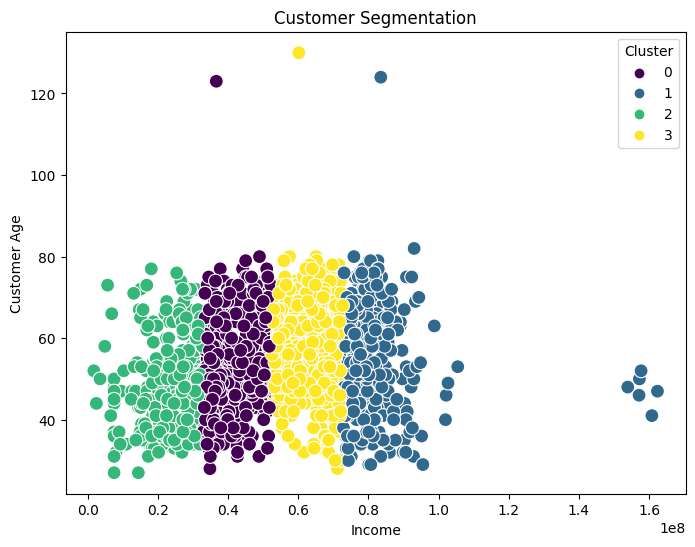

In [211]:
# Visualize the clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Income', y='Age', hue='Cluster', palette='viridis', s=100)

plt.title('Customer Segmentation')
plt.xlabel('Income')
plt.ylabel('Customer Age')
plt.legend(title='Cluster')

plt.show()

# Campaign Response Analysis¶

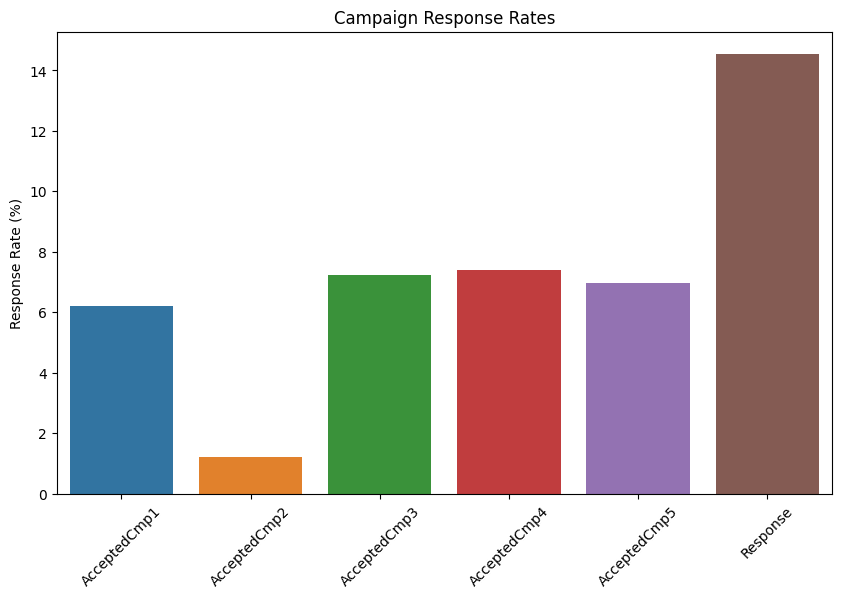

In [212]:
# Calculate response rates for each campaign
campaign_columns = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response']
response_rates = df[campaign_columns].mean() * 100

# Visualize response rates
plt.figure(figsize=(10, 6))
sns.barplot(x=response_rates.index, y=response_rates.values)

plt.title('Campaign Response Rates')
plt.ylabel('Response Rate (%)')
plt.xticks(rotation=45)

plt.show()

# t-SNE

In [229]:
from sklearn.manifold import TSNE

In [ ]:
for i in range(10,50):
    tsne = TSNE(n_components=2, random_state=1, perplexity=i)
    df_tsne = tsne.fit_transform(scaled_data)
    
df_tsne